Load stuff


In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import smooth


SEEDS = list(range(2016,2021))
EXP = [('final_exp_tno_ryes','false','false'),('final_exp_tyes_ryes','true','false'),
       ('final_exp_tyes_rno','true','true')]

all_experiments = []
for j in EXP:
    path = f'experiments/{j[0]}/experiments'
    memory = '1' if j[2] == 'true' else '10000'
    batch = '1' if j[2] == 'true' else '64'

    ep_durations = []
    for i in SEEDS:
        result = np.load(f'./{path}/hidden_128, memory_{memory}, env_MountainCar-v0, seed_{i}, \
lr_0.001, epsilon_0.5, discount_0.99, batch_size_{batch}, episodes_10000, epsilon_cap_4000, \
max_steps_2000, target_{j[1]}, no_replay_{j[2]}, C_10, save_amt_10/ep_durations.npy')
        ep_durations.append(result)

    all_experiments.append(ep_durations)

functions

In [4]:
def get_stats(all_exp: list):
    means = []
    stddevs = []
    for exp in all_exp:
        m = np.mean(exp, axis=0)
        s = np.std(exp, axis=0)
        means.append(m)
        stddevs.append(s)
        
    return means, stddevs


def plot_results(m, s, N=10, save=False):
    
    for idx, (x, std) in enumerate(zip(m,s)):
        t = 'yes' if EXP[idx][1] == 'true' else 'no'
        r = 'yes' if EXP[idx][2] == 'false' else 'no'
        title = f'target net:{t}, experience replay:{r}'
        x = smooth(x, N)
        std = smooth(std, N)
        steps = range(len(x))
        plt.figure(figsize=(20,10))
        plt.plot(x)
        plt.fill_between(steps, x-std, x+std, alpha=0.5)
        plt.title(f'Plot of returns|{title}')
        plt.xlabel('Episodes')
        plt.ylabel('Steps')
        if save:
            plt.savefig(f'experiments/{EXP[idx][0]}/results_smooth={N}.png')
        plt.show()

plotting

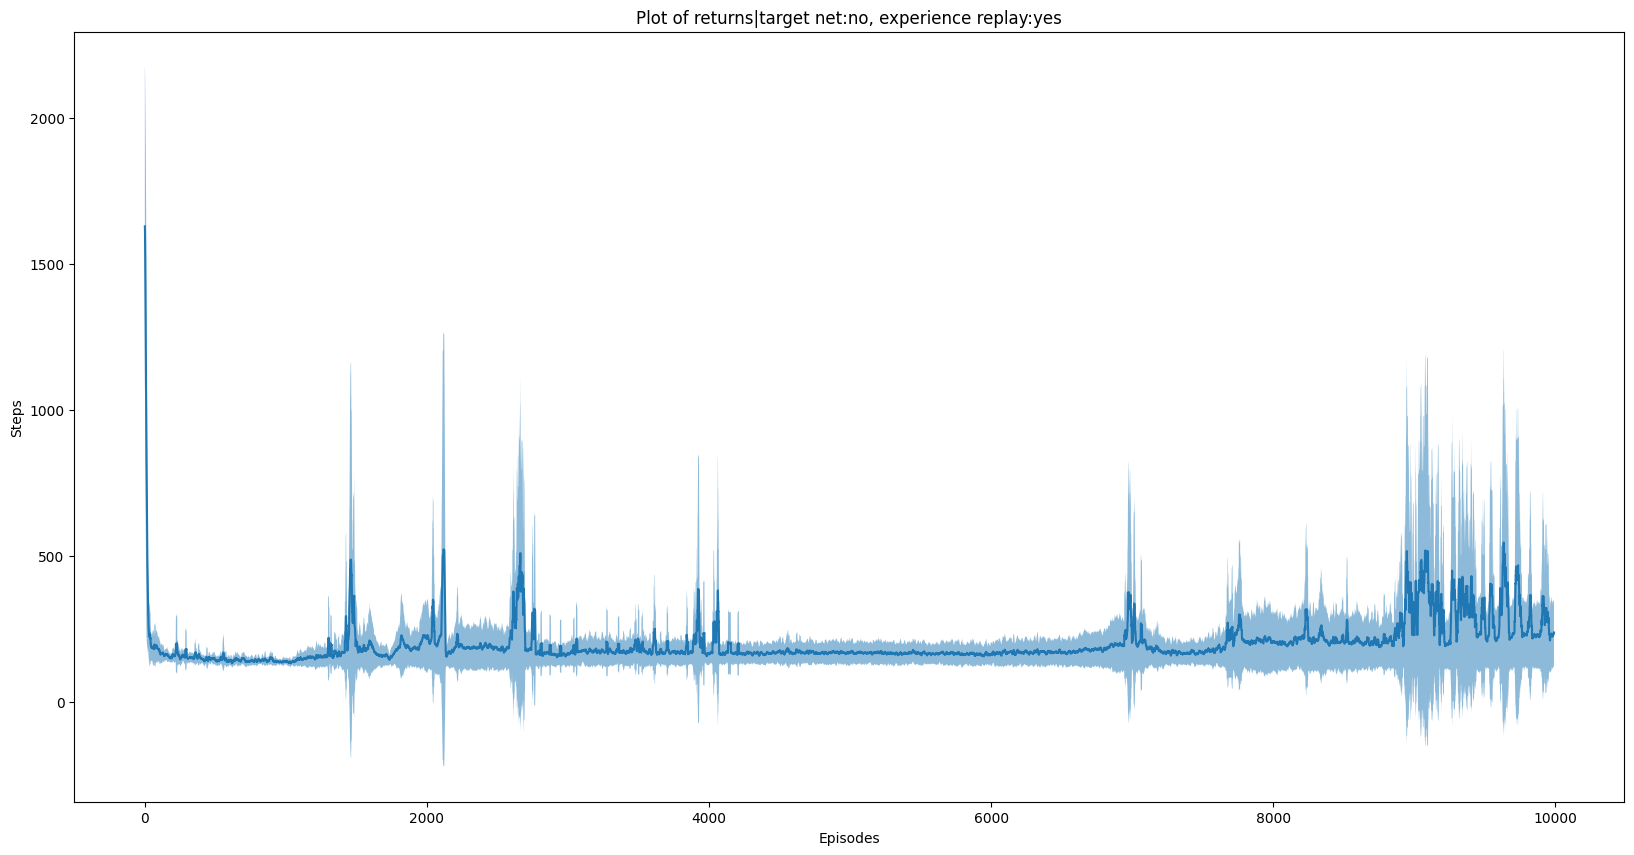

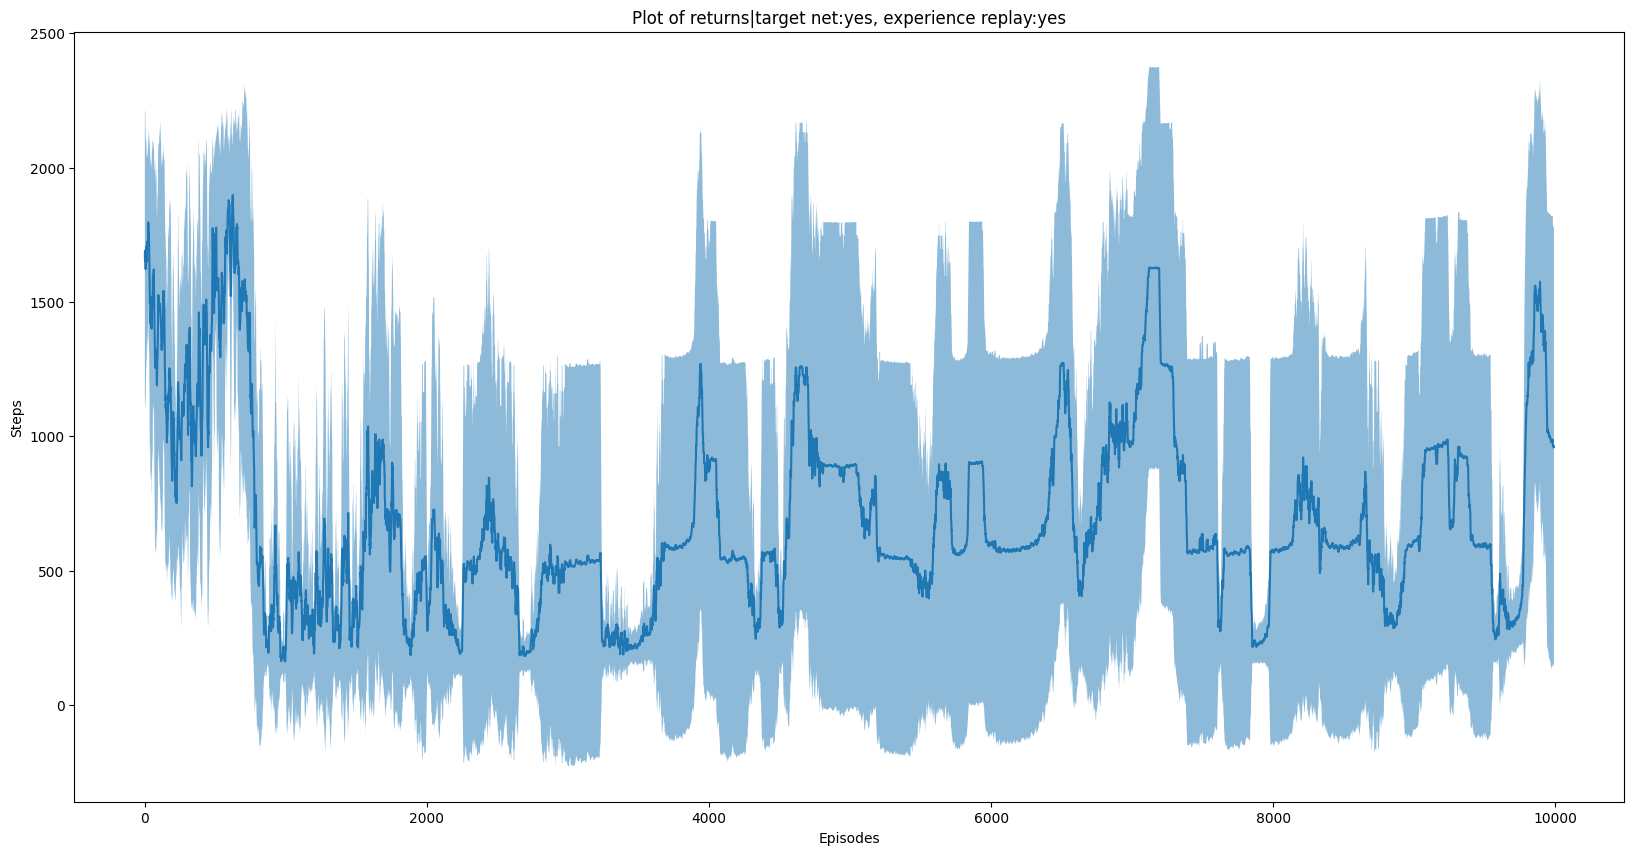

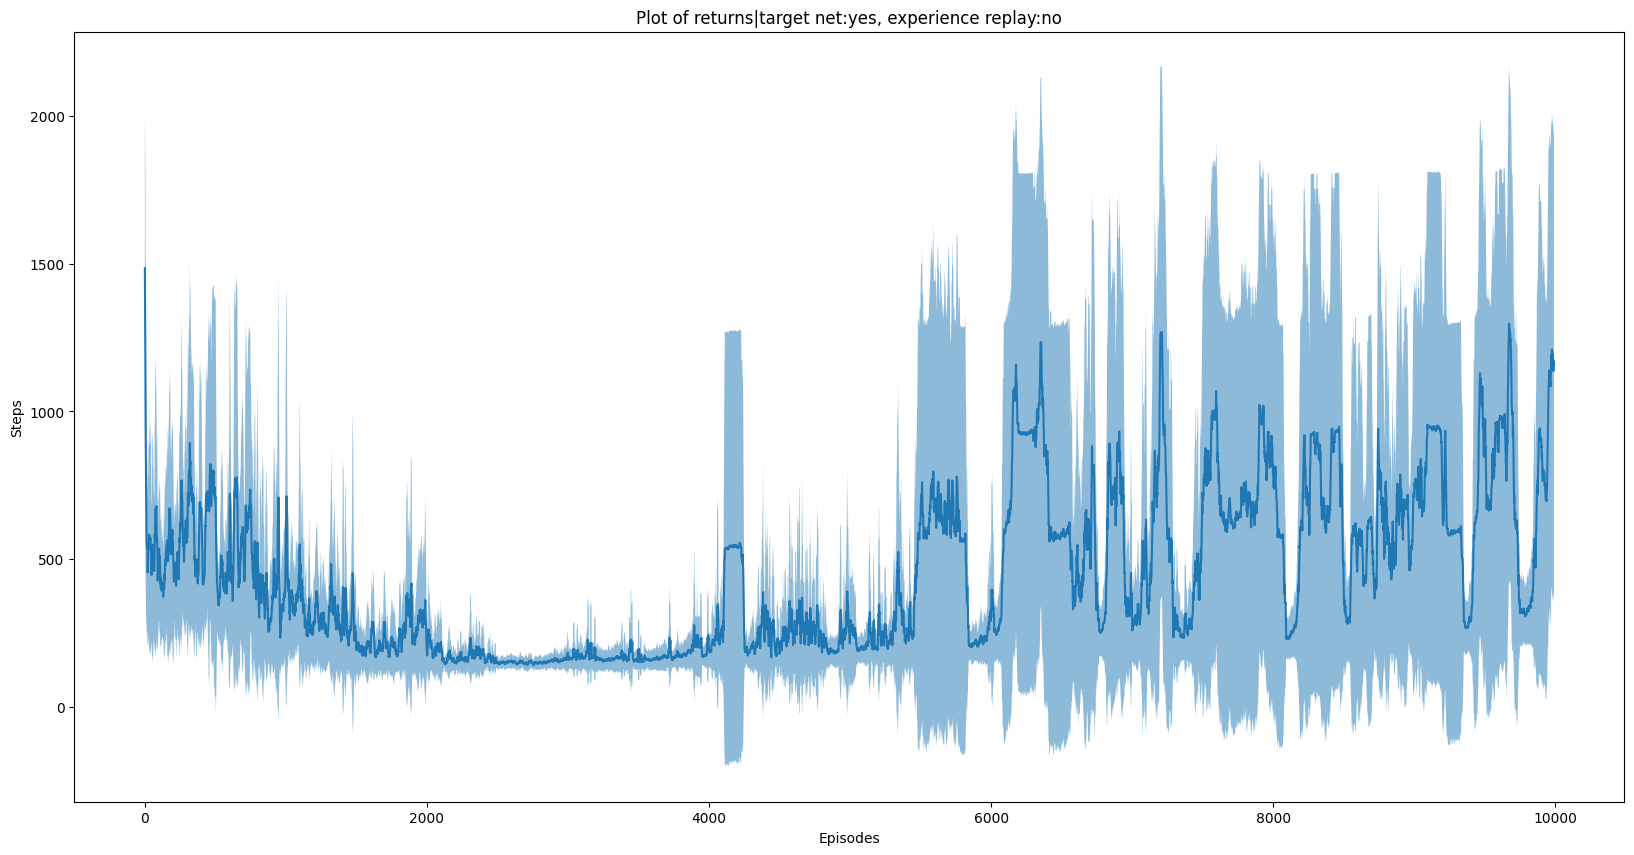

In [27]:
mu, sigma = get_stats(all_experiments)

plot_results(mu, sigma, save=True)